#Import Library

In [1]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization

#Load Data


Download Dataset from google drive, url : https://drive.google.com/file/d/1efi9N9x3SapdZeD8tW2H_KvEN9nMs1uV/view?usp=sharing

In [3]:
url = 'https://drive.google.com/file/d/1efi9N9x3SapdZeD8tW2H_KvEN9nMs1uV/view?usp=sharing'

In [4]:
id = url.split('d/')[1].split('/view?')[0]
print (id)

1efi9N9x3SapdZeD8tW2H_KvEN9nMs1uV


In [5]:
!gdown --id 1efi9N9x3SapdZeD8tW2H_KvEN9nMs1uV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1efi9N9x3SapdZeD8tW2H_KvEN9nMs1uV
To: /content/Batik Dataset.zip
100% 81.4M/81.4M [00:00<00:00, 129MB/s]


In [6]:
! unzip "Batik Dataset"

Archive:  Batik Dataset.zip
   creating: Batik Dataset/Testing/
   creating: Batik Dataset/Testing/Ceplok/
  inflating: Batik Dataset/Testing/Ceplok/Pekalongan-Truntum-Truntum-Non Sogan.jpg  
  inflating: Batik Dataset/Testing/Ceplok/SC012.jpg  
  inflating: Batik Dataset/Testing/Ceplok/YC119.jpg  
  inflating: Batik Dataset/Testing/Ceplok/YC132.jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Kerton-Truntum,Parang-Sogan - Copy.jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Kerton-Truntum,Parang-Sogan.jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Parang-Parang,Grompol-Sogan (1).jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Truntum--Sogan (2).jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Truntum--Sogan (3).jpg  
  inflating: Batik Dataset/Testing/Ceplok/Yogya-Truntum--Sogan (5).jpg  
   creating: Batik Dataset/Testing/Kawung/
  inflating: Batik Dataset/Testing/Kawung/10-nitik-motif-batik-kawung.jpg  
  inflating: Batik Dataset/Testing/Kawung/kawung pa

In [7]:
print(os.listdir('./Batik Dataset/Training'))
print(os.listdir('./Batik Dataset/Testing'))

['Nitik', 'Kawung', 'Lereng', 'Parang', 'Mix_motif', 'Ceplok']
['Nitik', 'Kawung', 'Lereng', 'Parang', 'Mix_motif', 'Ceplok']


In [8]:
! mkdir '/content/batik_dataset'
! mkdir '/content/batik_dataset/Ceplok'
! mkdir '/content/batik_dataset/Kawung'
! mkdir '/content/batik_dataset/Lereng'
! mkdir '/content/batik_dataset/Mix_motif'
! mkdir '/content/batik_dataset/Nitik'
! mkdir '/content/batik_dataset/Parang'
! mkdir '/content/batik_split'

In [9]:
# move all images
batik_ceplok_test = '/content/Batik Dataset/Testing/Ceplok/'
batik_ceplok_train = '/content/Batik Dataset/Training/Ceplok/'

batik_kawung_test = '/content/Batik Dataset/Testing/Kawung/'
batik_kawung_train = '/content/Batik Dataset/Training/Kawung/'

batik_lereng_test = '/content/Batik Dataset/Testing/Lereng/'
batik_lereng_train = '/content/Batik Dataset/Training/Lereng/'

batik_mix_motif_test = '/content/Batik Dataset/Testing/Mix_motif/'
batik_mix_motif_train = '/content/Batik Dataset/Training/Mix_motif/'

batik_nitik_test = '/content/Batik Dataset/Testing/Nitik/'
batik_nitik_train = '/content/Batik Dataset/Training/Nitik/'

batik_parang_test = '/content/Batik Dataset/Testing/Parang/'
batik_parang_train = '/content/Batik Dataset/Training/Parang/'


# chest_xray_source_normal_train = '/content/chest_xray/chest_xray/train/NORMAL/'
# chest_xray_source_normal_val = '/content/chest_xray/chest_xray/val/NORMAL/'

dest_ceplok = '/content/batik_dataset/Ceplok/'
dest_kawung = '/content/batik_dataset/Kawung/'
dest_lereng = '/content/batik_dataset/Lereng/'
dest_mix = '/content/batik_dataset/Mix_motif/'
dest_nitik = '/content/batik_dataset/Nitik/'
dest_parang = '/content/batik_dataset/Parang/'

allfiles_ceplok_test = os.listdir(batik_ceplok_test)
allfiles_ceplok_train = os.listdir(batik_ceplok_train)
allfiles_kawung_test = os.listdir(batik_kawung_test)
allfiles_kawung_train = os.listdir(batik_kawung_train)
allfiles_lereng_test = os.listdir(batik_lereng_test)
allfiles_lereng_train = os.listdir(batik_lereng_train)
allfiles_mix_test = os.listdir(batik_mix_motif_test)
allfiles_mix_train = os.listdir(batik_mix_motif_train)
allfiles_nitik_test = os.listdir(batik_nitik_test)
allfiles_nitik_train = os.listdir(batik_nitik_train)
allfiles_parang_test = os.listdir(batik_parang_test)
allfiles_parang_train = os.listdir(batik_parang_train)

#move all batik ceplok to dest
for f1 in allfiles_ceplok_test:
    shutil.move(batik_ceplok_test + f1, dest_ceplok + f1)
for f2 in allfiles_ceplok_train:
    shutil.move(batik_ceplok_train + f2, dest_ceplok + f2)

#move all batik kawung to dest
for f3 in allfiles_kawung_test:
    shutil.move(batik_kawung_test + f3, dest_kawung + f3)
for f4 in allfiles_kawung_train:
    shutil.move(batik_kawung_train + f4, dest_kawung + f4)

#move all batik lereng to dest
for f5 in allfiles_lereng_test:
    shutil.move(batik_lereng_test + f5, dest_lereng + f5)
for f6 in allfiles_lereng_train:
    shutil.move(batik_lereng_train + f6, dest_lereng + f6)

#move all batik mix to dest
for f7 in allfiles_mix_test:
    shutil.move(batik_mix_motif_test + f7, dest_mix + f7)
for f8 in allfiles_mix_train:
    shutil.move(batik_mix_motif_train + f8, dest_mix + f8)

#move all batik nitik to dest
for f9 in allfiles_nitik_test:
    shutil.move(batik_nitik_test + f9, dest_nitik + f9)
for f10 in allfiles_nitik_train:
    shutil.move(batik_nitik_train + f10, dest_nitik + f10)

#move all batik mix to dest
for f11 in allfiles_parang_test:
    shutil.move(batik_parang_test + f11, dest_parang + f11)
for f12 in allfiles_parang_train:
    shutil.move(batik_parang_train + f12, dest_parang + f12)

In [10]:
import os
# Function to rename multiple files
def main():
	i = 0
	ceplok="/content/batik_dataset/Ceplok/"
	kawung="/content/batik_dataset/Kawung/"
	lereng="/content/batik_dataset/Lereng/"
	mix_motif="/content/batik_dataset/Mix_motif/"
	nitik="/content/batik_dataset/Nitik/"
	parang="/content/batik_dataset/Parang/"

	for filename1 in os.listdir(ceplok):
		my_dest_ceplok ="ceplok" + str(i) + ".jpg"
		my_source_ceplok =ceplok + filename1
		my_dest_ceplok =ceplok + my_dest_ceplok
		# rename() function will
		# rename all the files
		os.rename(my_source_ceplok, my_dest_ceplok)
		i += 1
	for filename2 in os.listdir(kawung):
		my_dest_kawung ="kawung" + str(i) + ".jpg"
		my_source_kawung =kawung + filename2
		my_dest_kawung =kawung + my_dest_kawung
		# rename() function will
		# rename all the files
		os.rename(my_source_kawung, my_dest_kawung)
		i += 1
	for filename3 in os.listdir(lereng):
		my_dest_lereng ="lereng" + str(i) + ".jpg"
		my_source_lereng =lereng + filename3
		my_dest_lereng =lereng + my_dest_lereng
		# rename() function will
		# rename all the files
		os.rename(my_source_lereng, my_dest_lereng)
		i += 1
	for filename4 in os.listdir(mix_motif):
		my_dest_mix ="mix_motif" + str(i) + ".jpg"
		my_source_mix =mix_motif + filename4
		my_dest_mix =mix_motif + my_dest_mix
		# rename() function will
		# rename all the files
		os.rename(my_source_mix, my_dest_mix)
		i += 1
	for filename5 in os.listdir(nitik):
		my_dest_nitik ="nitik" + str(i) + ".jpg"
		my_source_nitik =nitik + filename5
		my_dest_nitik =nitik + my_dest_nitik
		# rename() function will
		# rename all the files
		os.rename(my_source_nitik, my_dest_nitik)
		i += 1
	for filename6 in os.listdir(parang):
		my_dest_parang ="parang" + str(i) + ".jpg"
		my_source_parang =parang + filename6
		my_dest_parang =parang + my_dest_parang
		# rename() function will
		# rename all the files
		os.rename(my_source_parang, my_dest_parang)
		i += 1
# Driver Code
if __name__ == '__main__':
	# Calling main() function
	main()

In [11]:
listdir_image = os.listdir('batik_dataset')
print(listdir_image)

['Nitik', 'Kawung', 'Lereng', 'Parang', 'Mix_motif', 'Ceplok']


In [12]:
# check a lot of data
dir_image ='./batik_dataset/'

for  item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

Nitik  :  120 images
Kawung  :  99 images
Lereng  :  62 images
Parang  :  179 images
Mix_motif  :  42 images
Ceplok  :  142 images


In [13]:
# delete dir that is not used
import shutil

list_category = ['Nitik', 'Kawung', 'Lereng', 'Parang', 'Mix_motif', 'Ceplok']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
        os.remove(path)
    elif os.path.isdir(path):
        shutil.rmtree(path)
    else:
        print("Unknown or already remove!")

listdir_image = os.listdir(dir_image)
listdir_image

['Nitik', 'Kawung', 'Lereng', 'Parang', 'Mix_motif', 'Ceplok']

In [ ]:
# # split dataset
# data_dir = '/content/batik_dataset'
# output = '/content/batik_split'
# splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7, .3))

Copying files: 645 files [00:00, 1953.64 files/s]


In [ ]:
# # create train, val paths
# base_dir = '/content/batik_split'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')

In [35]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in listdir_image:
  dir = os.path.join(dir_image, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)

    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

Nitik: 120
+ size =  (500, 500)
Kawung: 99
+ size =  (500, 500)
+ size =  (300, 300)
+ size =  (500, 500)
Lereng: 62
+ size =  (500, 500)
Parang: 176
+ size =  (500, 500)
Mix_motif: 42
+ size =  (1600, 1200)
+ size =  (500, 500)
+ size =  (320, 177)
+ size =  (448, 320)
+ size =  (1280, 960)
Ceplok: 142
+ size =  (500, 500)

Total : 641


Nitik


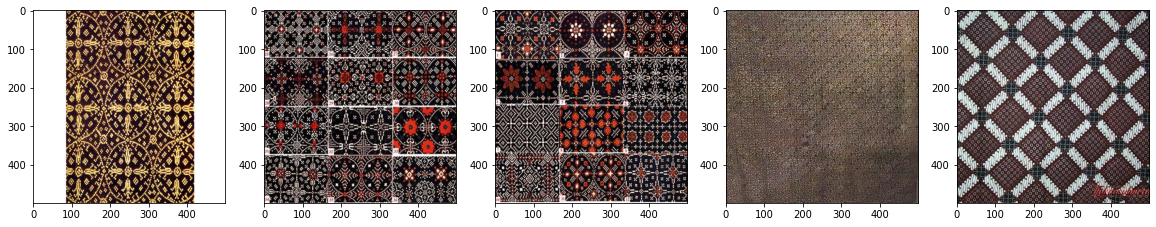

Kawung


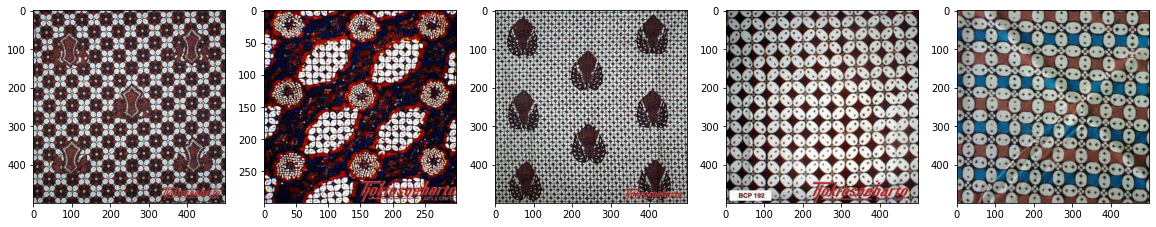

Lereng


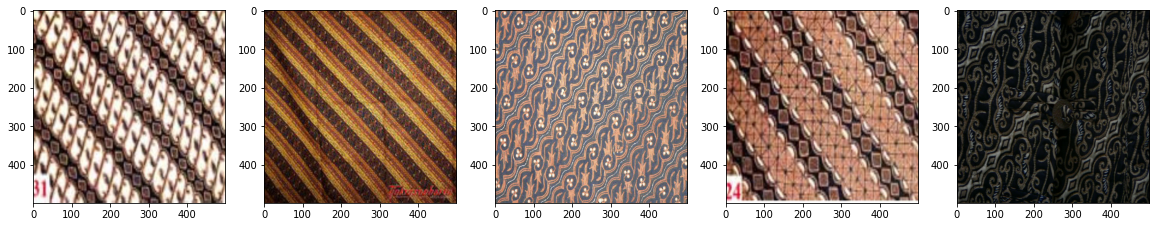

Parang


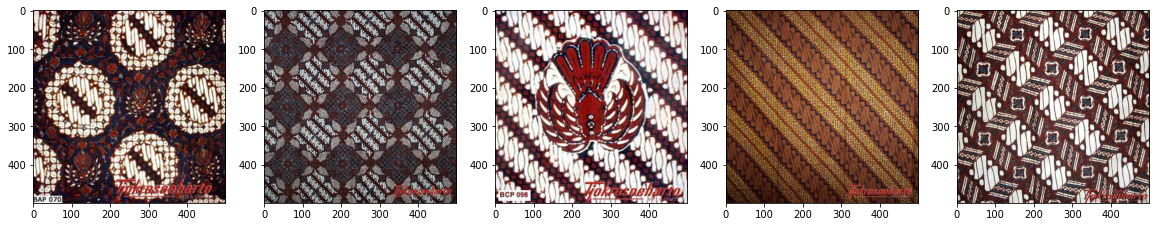

Mix_motif


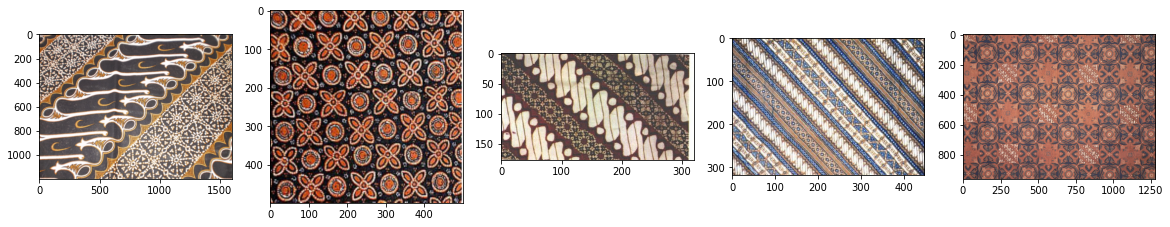

Ceplok


In [36]:
# check images class
import matplotlib.image as mpimg

for  item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

#Modeling


##Image Augmentation

In [37]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [38]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =(150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 513 images belonging to 6 classes.
Found 126 images belonging to 6 classes.


In [39]:
train_generator.class_indices

{'Ceplok': 0,
 'Kawung': 1,
 'Lereng': 2,
 'Mix_motif': 3,
 'Nitik': 4,
 'Parang': 5}

In [40]:
validation_generator.class_indices

{'Ceplok': 0,
 'Kawung': 1,
 'Lereng': 2,
 'Mix_motif': 3,
 'Nitik': 4,
 'Parang': 5}

In [41]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['Ceplok', 'Kawung', 'Lereng', 'Mix_motif', 'Nitik', 'Parang']

#Build & Train Model

##Train Model 1

In [42]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)       

In [44]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [45]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [46]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [47]:
mc = ModelCheckpoint('best_model_1_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

corrupt image : 
*   parang540
*   ceplok140
*   parang609





In [48]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 6.3685 - accuracy: 0.2031 

4/4 [==============================] - 41s 10s/step - loss: 6.3685 - accuracy: 0.2031
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 1.7277 - accuracy: 0.2266

4/4 [==============================] - 30s 7s/step - loss: 1.7277 - accuracy: 0.2266
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 1.8191 - accuracy: 0.1922

4/4 [==============================] - 22s 5s/step - loss: 1.8191 - accuracy: 0.1922
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 1.7155 - accuracy: 0.2701

4/4 [==============================] - 21s 4s/step - loss: 1.7155 - accuracy: 0.2701
Epoch 5/50
4/4 [==============================] - ETA: 0s - loss: 1.7812 - accuracy: 0.2078

4/4 [==============================] - 23s 5s/step - loss: 1.7812 - accuracy: 0.2078
Epoch 6/50
4/4 [==============================] - ETA: 0s - loss: 1.7198 - accuracy: 0.2773

4/4 [==============================] - 27s 6s/step - loss: 1.7198 - accuracy: 0.2773
Epoch 7/50
4/4 [==============================] - ETA: 0s - loss: 2.0529 - accuracy: 0.2390

4/4 [==============================] - 22s 5s/step - loss: 2.0529 - accuracy: 0.2390
Epoch 8/50
4/4 [==============================] - ETA: 0s - loss: 1.7512 - accuracy: 0.2779

4/4 [==============================] - 22s 7s/step - loss: 1.7512 - accuracy: 0.2779
Epoch 9/50
4/4 [==============================] - ETA: 0s - loss: 1.7156 - accuracy: 0.2676

4/4 [==============================] - 27s 6s/step - loss: 1.7156 - accuracy: 0.2676
Epoch 10/50
4/4 [==============================] - ETA: 0s - loss: 1.7120 - accuracy: 0.2753

4/4 [==============================] - 21s 4s/step - loss: 1.7120 - accuracy: 0.2753
Epoch 11/50
4/4 [==============================] - ETA: 0s - loss: 1.7444 - accuracy: 0.1922

4/4 [==============================] - 22s 5s/step - loss: 1.7444 - accuracy: 0.1922
Epoch 12/50
4/4 [==============================] - ETA: 0s - loss: 1.7215 - accuracy: 0.2246

4/4 [==============================] - 27s 6s/step - loss: 1.7215 - accuracy: 0.2246
Epoch 13/50
4/4 [==============================] - ETA: 0s - loss: 1.6975 - accuracy: 0.2701

4/4 [==============================] - 23s 5s/step - loss: 1.6975 - accuracy: 0.2701
Epoch 14/50
4/4 [==============================] - ETA: 0s - loss: 1.7017 - accuracy: 0.2734

4/4 [==============================] - 27s 6s/step - loss: 1.7017 - accuracy: 0.2734
Epoch 15/50
4/4 [==============================] - ETA: 0s - loss: 1.9512 - accuracy: 0.2675

4/4 [==============================] - 22s 5s/step - loss: 1.9512 - accuracy: 0.2675
Epoch 16/50
4/4 [==============================] - ETA: 0s - loss: 1.7331 - accuracy: 0.2649

4/4 [==============================] - 21s 4s/step - loss: 1.7331 - accuracy: 0.2649
Epoch 17/50
4/4 [==============================] - ETA: 0s - loss: 1.7390 - accuracy: 0.2753

4/4 [==============================] - 22s 5s/step - loss: 1.7390 - accuracy: 0.2753
Epoch 18/50
4/4 [==============================] - ETA: 0s - loss: 1.7157 - accuracy: 0.2649

4/4 [==============================] - 24s 5s/step - loss: 1.7157 - accuracy: 0.2649
Epoch 19/50
4/4 [==============================] - ETA: 0s - loss: 1.7551 - accuracy: 0.2324

4/4 [==============================] - 28s 7s/step - loss: 1.7551 - accuracy: 0.2324
Epoch 20/50
4/4 [==============================] - ETA: 0s - loss: 1.7328 - accuracy: 0.2727

4/4 [==============================] - 22s 5s/step - loss: 1.7328 - accuracy: 0.2727
Epoch 21/50
4/4 [==============================] - ETA: 0s - loss: 1.7416 - accuracy: 0.2571

4/4 [==============================] - 22s 5s/step - loss: 1.7416 - accuracy: 0.2571
Epoch 22/50
4/4 [==============================] - ETA: 0s - loss: 1.7307 - accuracy: 0.2734

4/4 [==============================] - 27s 6s/step - loss: 1.7307 - accuracy: 0.2734
Epoch 23/50
4/4 [==============================] - ETA: 0s - loss: 1.7035 - accuracy: 0.2519

4/4 [==============================] - 22s 5s/step - loss: 1.7035 - accuracy: 0.2519
Epoch 24/50
4/4 [==============================] - ETA: 0s - loss: 1.9076 - accuracy: 0.2753

4/4 [==============================] - 22s 7s/step - loss: 1.9076 - accuracy: 0.2753
Epoch 25/50
4/4 [==============================] - ETA: 0s - loss: 1.6833 - accuracy: 0.2753

4/4 [==============================] - 21s 4s/step - loss: 1.6833 - accuracy: 0.2753
Epoch 26/50
4/4 [==============================] - ETA: 0s - loss: 2.2659 - accuracy: 0.2649

4/4 [==============================] - 22s 5s/step - loss: 2.2659 - accuracy: 0.2649
Epoch 27/50
4/4 [==============================] - ETA: 0s - loss: 1.7132 - accuracy: 0.2545

4/4 [==============================] - 22s 7s/step - loss: 1.7132 - accuracy: 0.2545
Epoch 28/50
4/4 [==============================] - ETA: 0s - loss: 1.7442 - accuracy: 0.2805

4/4 [==============================] - 22s 7s/step - loss: 1.7442 - accuracy: 0.2805
Epoch 29/50
4/4 [==============================] - ETA: 0s - loss: 1.6963 - accuracy: 0.2571

4/4 [==============================] - 22s 5s/step - loss: 1.6963 - accuracy: 0.2571
Epoch 30/50
4/4 [==============================] - ETA: 0s - loss: 1.7628 - accuracy: 0.2234

4/4 [==============================] - 24s 5s/step - loss: 1.7628 - accuracy: 0.2234
Epoch 31/50
4/4 [==============================] - ETA: 0s - loss: 1.7432 - accuracy: 0.2130

4/4 [==============================] - 22s 5s/step - loss: 1.7432 - accuracy: 0.2130
Epoch 32/50
4/4 [==============================] - ETA: 0s - loss: 1.7059 - accuracy: 0.2779

4/4 [==============================] - 21s 4s/step - loss: 1.7059 - accuracy: 0.2779
Epoch 33/50
4/4 [==============================] - ETA: 0s - loss: 1.7271 - accuracy: 0.1870

4/4 [==============================] - 23s 5s/step - loss: 1.7271 - accuracy: 0.1870
Epoch 34/50
4/4 [==============================] - ETA: 0s - loss: 1.7082 - accuracy: 0.2754

4/4 [==============================] - 27s 6s/step - loss: 1.7082 - accuracy: 0.2754
Epoch 35/50
4/4 [==============================] - ETA: 0s - loss: 1.7237 - accuracy: 0.2519

4/4 [==============================] - 22s 7s/step - loss: 1.7237 - accuracy: 0.2519
Epoch 36/50
4/4 [==============================] - ETA: 0s - loss: 1.8548 - accuracy: 0.2649

4/4 [==============================] - 23s 5s/step - loss: 1.8548 - accuracy: 0.2649
Epoch 37/50
4/4 [==============================] - ETA: 0s - loss: 1.6986 - accuracy: 0.2754

4/4 [==============================] - 34s 8s/step - loss: 1.6986 - accuracy: 0.2754
Epoch 38/50
4/4 [==============================] - ETA: 0s - loss: 1.6978 - accuracy: 0.3377 

4/4 [==============================] - 28s 9s/step - loss: 1.6978 - accuracy: 0.3377
Epoch 39/50
4/4 [==============================] - ETA: 0s - loss: 1.8325 - accuracy: 0.2779

4/4 [==============================] - 24s 5s/step - loss: 1.8325 - accuracy: 0.2779
Epoch 40/50
4/4 [==============================] - ETA: 0s - loss: 1.7538 - accuracy: 0.2571

4/4 [==============================] - 24s 5s/step - loss: 1.7538 - accuracy: 0.2571
Epoch 41/50
4/4 [==============================] - ETA: 0s - loss: 1.7798 - accuracy: 0.2935

4/4 [==============================] - 23s 5s/step - loss: 1.7798 - accuracy: 0.2935
Epoch 42/50
4/4 [==============================] - ETA: 0s - loss: 1.8170 - accuracy: 0.2260

4/4 [==============================] - 22s 7s/step - loss: 1.8170 - accuracy: 0.2260
Epoch 43/50
4/4 [==============================] - ETA: 0s - loss: 1.6672 - accuracy: 0.2857

4/4 [==============================] - 22s 4s/step - loss: 1.6672 - accuracy: 0.2857
Epoch 44/50
4/4 [==============================] - ETA: 0s - loss: 1.6806 - accuracy: 0.2390

4/4 [==============================] - 22s 5s/step - loss: 1.6806 - accuracy: 0.2390
Epoch 45/50
4/4 [==============================] - ETA: 0s - loss: 1.7399 - accuracy: 0.2364

4/4 [==============================] - 22s 5s/step - loss: 1.7399 - accuracy: 0.2364
Epoch 46/50
4/4 [==============================] - ETA: 0s - loss: 1.7076 - accuracy: 0.2104

4/4 [==============================] - 21s 4s/step - loss: 1.7076 - accuracy: 0.2104
Epoch 47/50
4/4 [==============================] - ETA: 0s - loss: 1.8109 - accuracy: 0.2754

4/4 [==============================] - 27s 6s/step - loss: 1.8109 - accuracy: 0.2754
Epoch 48/50
4/4 [==============================] - ETA: 0s - loss: 1.6862 - accuracy: 0.2935

4/4 [==============================] - 21s 4s/step - loss: 1.6862 - accuracy: 0.2935
Epoch 49/50
4/4 [==============================] - ETA: 0s - loss: 1.7700 - accuracy: 0.2779

4/4 [==============================] - 22s 5s/step - loss: 1.7700 - accuracy: 0.2779
Epoch 50/50
4/4 [==============================] - ETA: 0s - loss: 1.7516 - accuracy: 0.2649

4/4 [==============================] - 21s 7s/step - loss: 1.7516 - accuracy: 0.2649


##Plotting Model

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss Model')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

#Predict and evaluate model

In [70]:
# from google.colab import files
# from keras.preprocessing import image
 
# uploaded = files.upload()
 
# for path in uploaded.keys():
#   img = image.load_img(path, target_size=(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   images = np.vstack([x])
#   images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
#   classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
#   predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

# if predicted_class_indices == 0:
#     print('Ceplok')
# elif predicted_class_indices == 1:
#   print('Kawung')
# elif predicted_class_indices == 2:
#   print('Lereng')
# elif predicted_class_indices == 3:
#   print('Mix_motif')
# elif predicted_class_indices == 4:
#   print('Nitik')
# else:
#   print('Parang')

#Save Model

In [71]:
# import tempfile
# MODEL_DIR = tempfile.gettempdir()

# version = 1

# export_path = os.path.join(MODEL_DIR, str(version))

# if os.path.isdir(export_path):
#     print('\nAlready saved a model, cleaning up\n')
#     !rm -r {export_path}

# model.save(export_path, save_format="tf")

# print('\nexport_path = {}'.format(export_path))
# !ls -l {export_path}

#Train Model 2

In [62]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 165888)            0         
                                                                 
 dropout_5 (Dropout)         (None, 165888)           

In [64]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [65]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [66]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [67]:
mc = ModelCheckpoint('best_model_1_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [68]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 25.4789 - accuracy: 0.1870

4/4 [==============================] - 41s 9s/step - loss: 25.4789 - accuracy: 0.1870
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 3.0555 - accuracy: 0.1816 

4/4 [==============================] - 47s 11s/step - loss: 3.0555 - accuracy: 0.1816
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 1.7843 - accuracy: 0.1948

4/4 [==============================] - 38s 8s/step - loss: 1.7843 - accuracy: 0.1948
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 1.7846 - accuracy: 0.1948

4/4 [==============================] - 42s 8s/step - loss: 1.7846 - accuracy: 0.1948
Epoch 5/10
4/4 [==============================] - ETA: 0s - loss: 1.7707 - accuracy: 0.2104

4/4 [==============================] - 37s 8s/step - loss: 1.7707 - accuracy: 0.2104
Epoch 6/10
4/4 [==============================] - ETA: 0s - loss: 1.7727 - accuracy: 0.1740

4/4 [==============================] - 37s 8s/step - loss: 1.7727 - accuracy: 0.1740
Epoch 7/10
4/4 [==============================] - ETA: 0s - loss: 1.7726 - accuracy: 0.2675

4/4 [==============================] - 37s 8s/step - loss: 1.7726 - accuracy: 0.2675
Epoch 8/10
4/4 [==============================] - ETA: 0s - loss: 1.7777 - accuracy: 0.2909 

4/4 [==============================] - 37s 8s/step - loss: 1.7777 - accuracy: 0.2909
Epoch 9/10
4/4 [==============================] - ETA: 0s - loss: 1.7785 - accuracy: 0.2831 

4/4 [==============================] - 36s 12s/step - loss: 1.7785 - accuracy: 0.2831
Epoch 10/10
4/4 [==============================] - ETA: 0s - loss: 1.7764 - accuracy: 0.3013 

4/4 [==============================] - 36s 8s/step - loss: 1.7764 - accuracy: 0.3013
